# Examples of reading common data formats
 - This uses the example data in the ncempy repository online
 - The notebook shows how to use the various io functionality of ncempy to read most types of S/TEM data files
 - An example of putting a scale bar on an image is in the last cell

In [1]:
%matplotlib notebook

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import ncempy.io as nio

# Location of test data
 - Here I define the location of the test data available in the ncempy/data/ directory in the repositry

In [7]:
directory_path = Path(r'C:\Users\linol\Documents\scripting\openNCEM\ncempy\data')

# General reader function
 - There exists a general reader function which opens a file based on its file extension
 - This is the simplest way to get the data from supported files into memory

<IPython.core.display.Javascript object>


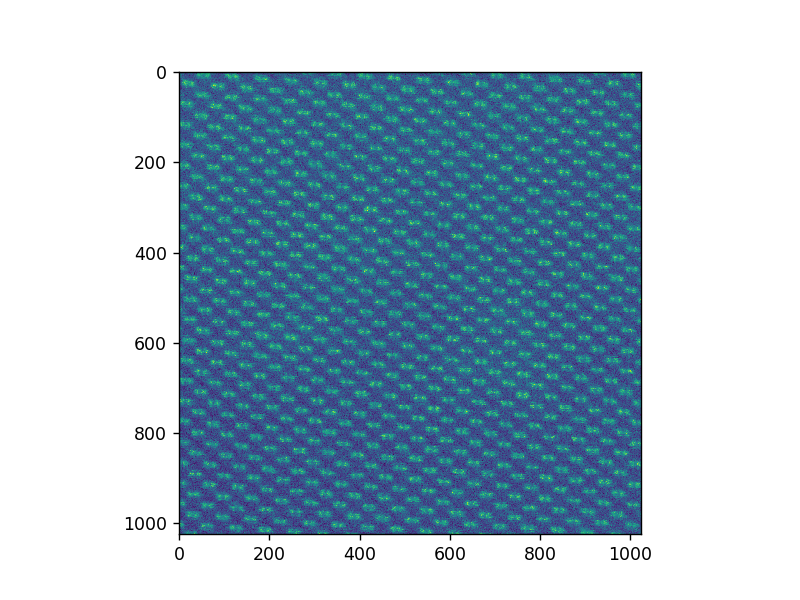

In [6]:
file_name = Path('01_Si110_5images_1.ser')
ser0 = nio.read(directory_path / file_name)

fg, ax = plt.subplots(1,1)
ax.imshow(ser0['data'][0, :, :])

# SER file

<IPython.core.display.Javascript object>


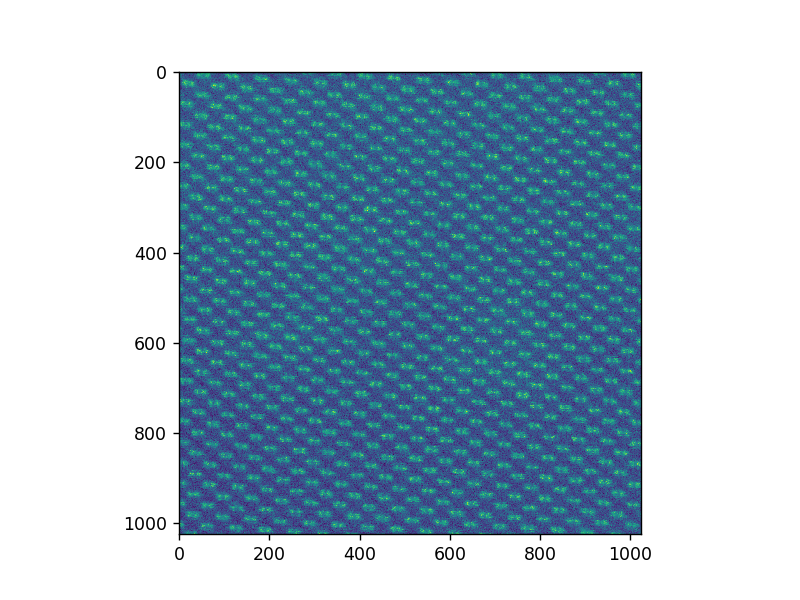

data
pixelSize
pixelUnit
pixelOrigin
filename
metadata
------
The X pixel size is 8.67462211402956e-12


In [12]:
# load a SER file

# Use a string the specify the file path
ser_file = Path('01_Si110_5images_1.ser')

# Read the data using a simple command
ser0 = nio.ser.serReader(directory_path / ser_file) # Returns a dictionary of data and meta data

fg, ax = plt.subplots(1,1)
ax.imshow(ser0['data'][0,:,:])

# Available meta data
for key in ser0.keys():
    print(key)
    
# Extract meta data 
print('------')
print('The X pixel size is {}'.format(ser0['pixelSize'][0]))

# MRC data
 - can read .mrc, .rec, .ali and .st
 - The file is a small one with just random values

<IPython.core.display.Javascript object>


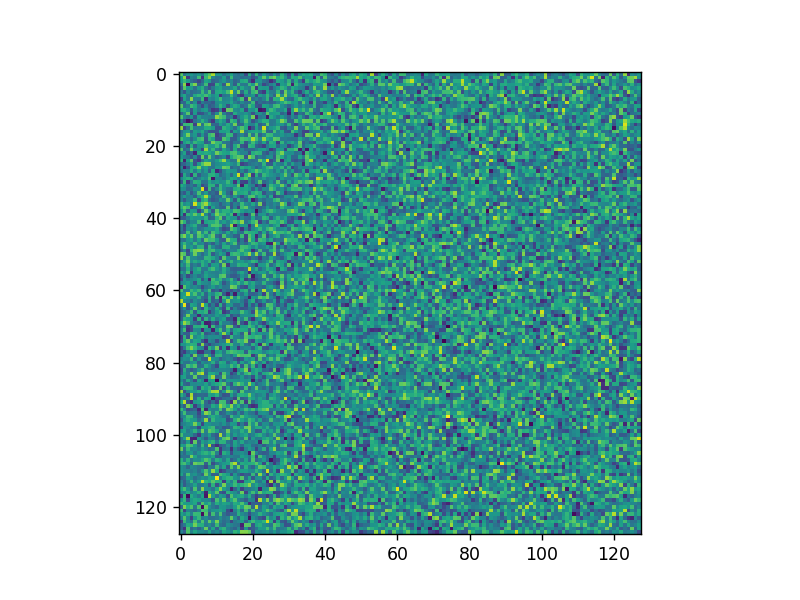

pixelSize
voxelSize
cellAngles
axisOrientations
filename
data
pixelUnit


In [22]:
mrc_file = 'temp.mrc' # just random numbers

mrc0 = nio.mrc.mrcReader(directory_path / mrc_file)

fg, ax = plt.subplots(1,1)
ax.imshow(mrc0['data'].sum(axis=0))

# Available meta data
for key in mrc0.keys():
    print(key)


# Read Berkeley formatted EMD files

<IPython.core.display.Javascript object>


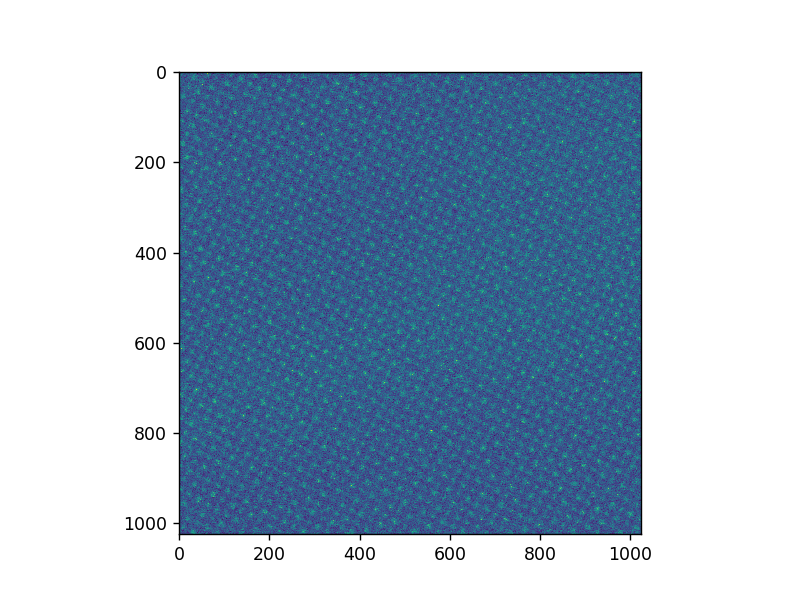

data
filename
pixelSize
pixelUnit
pixelName


In [25]:
# Load a Berkeley EMD file

emd_file = 'Acquisition_18.emd'

emd0 = nio.emd.emdReader(directory_path / emd_file)

fg,ax = plt.subplots(1,1)
axIm = ax.imshow(emd0['data'])

#Print out the pixelSize, which are the dim vectors, names and units
# Available meta data
for key in emd0.keys():
    print(key)

# Read Velox EMD file

<IPython.core.display.Javascript object>


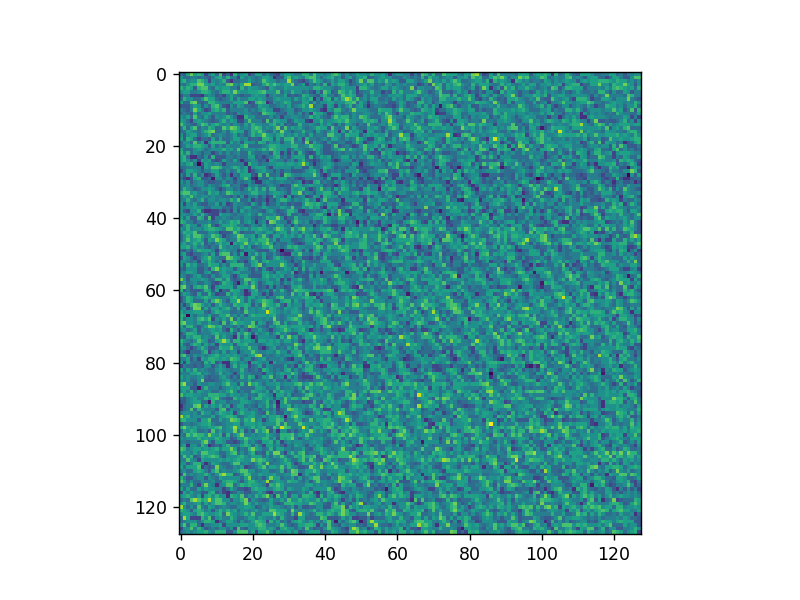

data = [[9994 9993 9997 ... 9995 9996 9996]
 [9996 9994 9994 ... 9996 9999 9999]
 [9997 9998 9995 ... 9996 9994 9996]
 ...
 [9996 9999 9994 ... 9996 9996 9993]
 [9992 9996 9996 ... 9996 9998 9996]
 [9994 9995 9996 ... 9997 9998 9992]]
filename = C:\Users\linol\Documents\scripting\openNCEM\ncempy\data\STEM HAADF-DF4-DF2-BF Diffraction Micro.emd
pixelUnit = ['nm', 'nm']
pixelSizeUnit = ['nm', 'nm']
pixelSize = (87.37079614225583, 87.37079614225583)
AcquisitionTime = 2020-07-29 09:49:51
Stage = {'Position': {'x': '5.7680999999997034e-07', 'y': '1.3770000000105029e-08', 'z': '-6.8790000000041421e-08'}, 'AlphaTilt': '-3.1359999999161964e-06', 'BetaTilt': '0.00059311804152093828', 'HolderType': 'No Specimen Holder'}
detectorName = HAADF
dwellTime = 1.0000000000000001e-05


In [42]:
# Read a FEI EMD VELOX file
# This EMD file has 3 STEM data sets in it (HAADF, ADF, BF)

emd_file = 'STEM HAADF-DF4-DF2-BF Diffraction Micro.emd'

# Read in each data set
emdv0 = nio.emdVelox.emdVeloxReader(directory_path / emd_file, dsetNum=0)

# Plot all three images. If you zoom in they all zoom equally.
fg,ax = plt.subplots(1, 1)
ax.imshow(emdv0['data'])

# Print out the keys in the python dictionary
for key, value in emdv0.items():
    print('{} = {}'.format(key, value))

# Plot an image with a scale bar

<IPython.core.display.Javascript object>


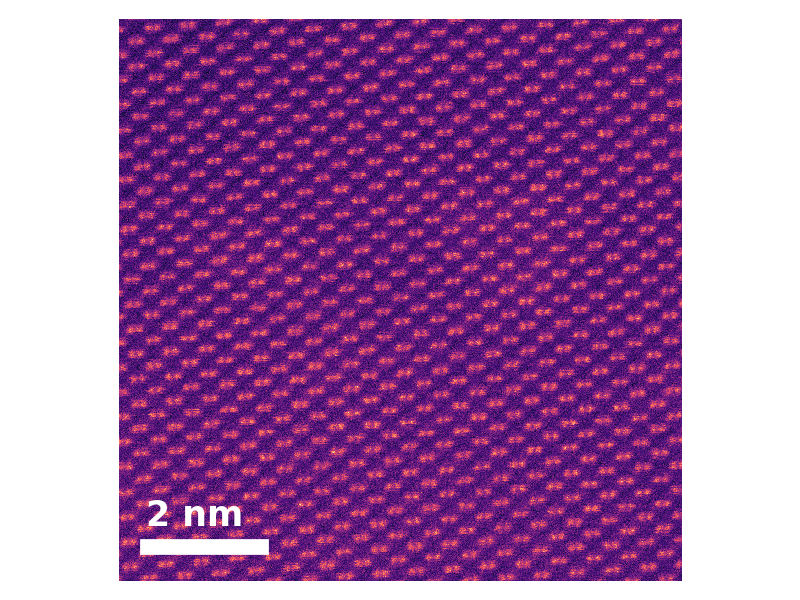

In [43]:
from matplotlib.patches import Rectangle

ser0 = nio.ser.serReader(directory_path / ser_file)

image0 = ser0['data'][0,:,:]

# Plot the image data
fg, ax = plt.subplots(1,1)
ax.imshow(image0, origin='lower', cmap='magma')
ax.axis('off')

# Add a scale bar
scaleL = 2/(ser0['pixelSize'][0]*1e9) # scale bar length (nm)
scaleH = 25 # height of the scale bar rectangle
scale_R = Rectangle((40,50),scaleL,scaleH,color='w')
ax.add_patch(scale_R)
ax.text(50, 100,'2 nm',fontdict={'size':20,'weight':'bold','color':'w'})

fg.tight_layout()